[0, 135, 41, 5, 131, 471, 172, 207, 110, 44]


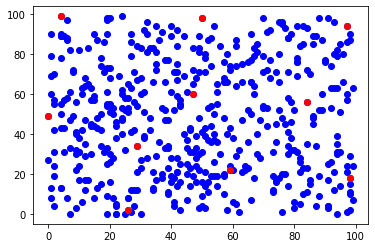

In [102]:
#k center problem with outliers
import numpy as np
import matplotlib.pyplot as plt
import math
import itertools


class KCenterProblemWithOutliers():
  def __init__(self, x_input, y_input) -> None:
    self.x_input, self.y_input = x_input, y_input
    self.NUM_INPUTS = len(x_input)
    self.dists = [[0 for _ in range(self.NUM_INPUTS)] for _ in range(self.NUM_INPUTS)]
    self.selected_samples = []

  def compute_dists(self):
    for r in range(self.NUM_INPUTS):
      for c in range(self.NUM_INPUTS):
        if not r == c:
          self.dists[r][c] = math.sqrt((self.x_input[r] - self.x_input[c])**2 + (self.y_input[r] - self.y_input[c])**2)

  def select_samples(self, query_size):
    def maxindex(dist):
      max_ind = 0
      for i in range(self.NUM_INPUTS):
          if (dist[i] > dist[max_ind]):
              max_ind = i
      return max_ind

    self.compute_dists()

    self.center_dists = [float('inf') for _ in range(self.NUM_INPUTS)]

    max_center = 0

    for _ in range(query_size):
      self.selected_samples.append(max_center)
      
      for j in range(self.NUM_INPUTS):
        self.center_dists[j] = min(self.center_dists[j], self.dists[max_center][j])
      
      max_center = maxindex(self.center_dists)

    print(self.selected_samples)

    x_query, y_query = [], []
    for sample_ind in self.selected_samples:
      x_query.append(self.x_input[sample_ind])
      y_query.append(self.y_input[sample_ind])

    self.plot_points(x_input, y_input, x_query, y_query)

  def plot_points(self, x_input, y_input, x_query, y_query):
    plt.scatter(x=x_input, y=y_input, color='blue')
    plt.scatter(x=x_query, y=y_query, color='red')
    plt.show()

if __name__ == '__main__' :
  min_val, max_val, num_vals = 0, 100, 500
  query_size = 10

  x_input = np.random.randint(min_val, max_val, num_vals).tolist()
  y_input = np.random.randint(min_val, max_val, num_vals).tolist()

  query = KCenterProblemWithOutliers(x_input, y_input)
  query.select_samples(query_size)